In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import os

In [2]:

path = 'D:\\Projects\\datasets\\customer_history\\DeFacto_scores'
os.chdir(path)
df_defacto = pd.read_csv('Score_Dress_Special_March_2020.csv',
                        delimiter=';',
                        decimal=',')
df_defacto.columns = [c.lower() for c in df_defacto.columns]

In [3]:
path = 'D:\\Projects\\datasets\\customer_history\\selection_March_2020'
os.chdir(path)

In [4]:
df_orsay = pd.read_csv('output_scores_orsay_all_countries_one_file_06032020.csv',
                       engine='python',
                       error_bad_lines=False)

In [7]:
df_orsay

,Unnamed: 0,sfid,frequency,recency,T,monetary_value,pred_purch_coming_week=4,norm_purchase
0,0,0031i000001rNElAAM,1.0,1.0,55.0,117.950000,0.053829,0.015498
1,1,0031i000001rNF0AAM,5.0,45.0,56.0,19.042000,0.311833,0.089780
2,2,0031i000001rNF1AAM,21.0,63.0,68.0,46.718568,1.039928,0.299407
3,3,0031i000001rNF5AAM,9.0,47.0,55.0,45.621111,0.545092,0.156938
4,4,0031i000001rNF6AAM,0.0,0.0,55.0,0.000000,0.037157,0.010698
...,...,...,...,...,...,...,...,...
7079603,7079603,0035800001gxdDGAAY,5.0,46.0,55.0,20.932000,0.317680,0.091464
7079604,7079604,0035800001gxdDHAAY,0.0,0.0,55.0,0.000000,0.037157,0.010698
7079605,7079605,0035800001gxdDIAAY,1.0,27.0,55.0,25.990000,0.082436,0.023734
7079606,7079606,0035800001gxdJgAAI,4.0,48.0,55.0,34.470964,0.261727,0.075354


In [ ]:
df_orsay_to_export = df_orsay.copy()

df_orsay_to_export = (df_orsay_to_export.drop(columns={'Unnamed: 0', 
                                 'frequency',
                                 'recency',
                                 'T',
                                 'monetary_value',
                                 'pred_purch_coming_week=4'})
                  .rename(columns={'sfid': 'SFID',
                                   'norm_purchase': 'Score'})
                  .assign(ScoringIdentifier = 'Orsay_Dress_Special_2020')
                 # .assign(Score = lambda d: d.Score.round(decimals=6).astype(str).str.replace('.', ','))
    )[['SFID', 'ScoringIdentifier', 'Score']]

In [22]:
df_orsay_to_export.to_csv('orsay_customer_to_integrate_v3.csv', index=False)

In [23]:
df_orsay_to_export.dtypes

SFID                  object
ScoringIdentifier     object
Score                float64
dtype: object

In [5]:
df_country_keys = pd.read_csv('BI_sfid_to_contry.csv')
df_country_keys = df_country_keys.rename(columns={'SALESFORCEID': 'sfid', 
                                                  'ACC_COUNTRY': 'account_country',
                                                  'CUST_COUNTRY': 'member_country'})

In [6]:
# Merge DeFacto and Orsay scores
merged_dat = pd.merge(df_defacto, df_orsay[['sfid', 'norm_purchase']], how='outer', on= 'sfid')
# Merge country identifier
merged_dat = pd.merge(merged_dat, df_country_keys, how='left', on= 'sfid')
# Rename columns
merged_dat = merged_dat.rename(columns={'norm_purchase': 'orsay_score',
                                        'score': 'defacto_score'}).reset_index(drop=True)

C:\Users\jhernandez-lallement\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 1378494 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


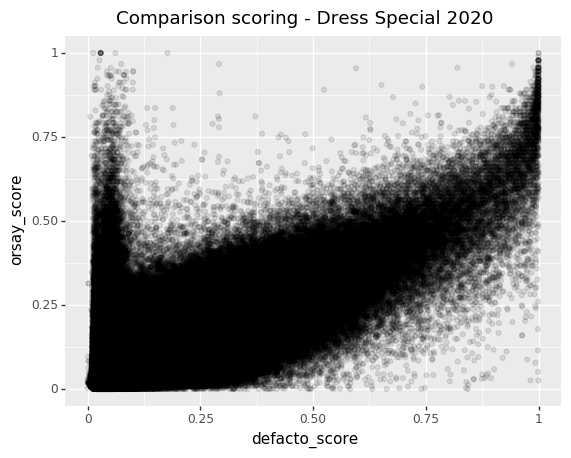

<ggplot: (-9223371954937707120)>

In [24]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=8,
                                                         angle=0, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=8,
                                                         angle=0, hjust=1.0),
                           figure_size=(12, 6))

(p9.ggplot() 
+ p9.geom_point(mapping=p9.aes(x='defacto_score', y='orsay_score'), data=merged_dat, alpha=0.1)
+ p9.labs(title='Comparison scoring - Dress Special 2020')
)

In [25]:
plt.save('filename.png', height=6, width=8)

C:\Users\jhernandez-lallement\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\jhernandez-lallement\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: filename.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\jhernandez-lallement\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 1378494 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


In [26]:
pwd

'D:\\Projects\\datasets\\customer_history\\selection_March_2020'

In [10]:
number_WH_country = {
    'AT': 15000,
    'CH': 0,
    'CZ':38000,
    'HU':20000,
    'DE':38000,
    'PL':38000,
    'SK':11000,
    'RO':10000,
    'HR':5000,
    'RS':5000,
    'SI':5000
                    }

In [11]:
final_df = pd.DataFrame()
for i in merged_dat.account_country.dropna().unique():
    #Isolate country
    df_curr = merged_dat.loc[merged_dat.account_country == i]
    print('Calculating now for country = ' + str(i))
    # Fetch maximum white mail customers
    max_cust = [v for k,v in number_WH_country.items() if k == i][0]
    # Create binary mask according to maximum number of White Mail per country
    mask = pd.concat([pd.Series(np.ones(max_cust)), pd.Series(np.zeros(df_curr.shape[0] - max_cust))]).reset_index(drop=True)
    # Sort according to Orsay score and assign mask
    df_curr = df_curr.sort_values(by='orsay_score', ascending=False).reset_index(drop=True)
    df_curr = df_curr.assign(orsay_mask = mask)
    # Sort according to DeFacto score and assign mask
    df_curr = df_curr.sort_values(by='defacto_score', ascending=False).reset_index()
    df_curr = df_curr.assign(defacto_mask = mask) 
    
    final_df = final_df.append(df_curr)
    print(' Done appending for country = ' + str(i))

Calculating now for country = DE
 Done appending for country = DE
Calculating now for country = RO
 Done appending for country = RO
Calculating now for country = RS
 Done appending for country = RS
Calculating now for country = PL
 Done appending for country = PL
Calculating now for country = CH
 Done appending for country = CH
Calculating now for country = SK
 Done appending for country = SK
Calculating now for country = HR
 Done appending for country = HR
Calculating now for country = AT
 Done appending for country = AT
Calculating now for country = HU
 Done appending for country = HU
Calculating now for country = CZ
 Done appending for country = CZ
Calculating now for country = SI
 Done appending for country = SI


In [12]:
(final_df.loc[(
                (final_df.account_country == 'PL') 
               |(final_df.account_country == 'DE')
               |(final_df.account_country == 'CZ')
               |(final_df.account_country == 'HU')
              )
              & ((final_df.orsay_mask   == 1) 
              & ( final_df.defacto_mask == 0))]
)#.dropna().tail(50)

,index,sfid,scoringidentifier,defacto_score,orsay_score,account_country,member_country,orsay_mask,defacto_mask
20000,11278,0035800000zpNyDAAU,Dress Special 2020,0.278214,0.260491,HU,HU,1.0,0.0
20001,15751,0035800000yrjf7AAA,Dress Special 2020,0.278207,0.230070,HU,HU,1.0,0.0
20002,13931,0031i000001rNmpAAE,Dress Special 2020,0.278191,0.241055,HU,HU,1.0,0.0
20005,6816,0035800001a3TehAAE,Dress Special 2020,0.278186,0.312624,HU,HU,1.0,0.0
20012,15587,0031i000004uHUPAA2,Dress Special 2020,0.278154,0.231287,HU,HU,1.0,0.0
...,...,...,...,...,...,...,...,...,...
392536,19923,0031i00000SrwyQAAR,NaN,NaN,0.208399,HU,HU,1.0,0.0
392537,19928,0031i00000RHWF8AAP,NaN,NaN,0.208386,HU,HU,1.0,0.0
392538,19935,0031i00000PbYKAAA3,NaN,NaN,0.208334,HU,HU,1.0,0.0
392539,19949,0031i00000SOR7tAAH,NaN,NaN,0.208300,HU,HU,1.0,0.0


In [65]:
merged_dat = (merged_dat
              .assign(source = merged_dat[['defacto_score', 'orsay_score']].idxmax(axis=1))
              .assign(final_score = merged_dat[['defacto_score', 'orsay_score']].max(axis=1))
              .assign(defacto_minus_orsay = lambda d: d.score - d.norm_purchase)
                )

In [73]:
merged_dat = merged_dat[['sfid',
                        'scoringidentifier', 
                        'final_score', 
                        'score',
                        'norm_purchase',
                        'source',            
                        'defacto_minus_orsay']]

In [75]:
merged_dat = merged_dat.rename(columns={'score': 'defacto_score',
                           'norm_purchase' : 'orsay_score',
                           'final_score': 'score'})

In [76]:
merged_dat.to_csv('scores_for_export_09032020.csv')

In [77]:
pwd

'U:\\Projects\\datasets\\customer_history\\selection_March_2020'

In [78]:
merged_dat

,sfid,scoringidentifier,score,defacto_score,orsay_score,source,defacto_minus_orsay
0,0035800000Ge5oAAAR,Dress Special 2020,0.225776,0.225776,0.142543,score,0.083233
1,0031i00000PZQvUAAX,Dress Special 2020,0.073314,0.073314,NaN,score,NaN
2,0031i00000Pa5dJAAR,Dress Special 2020,0.096238,0.096238,NaN,score,NaN
3,0031i00000PalQMAAZ,Dress Special 2020,0.060715,0.060715,NaN,score,NaN
4,0031i00000PbKcAAAV,Dress Special 2020,0.031991,0.031991,NaN,score,NaN
...,...,...,...,...,...,...,...
8229616,0031i00000Otu6RAAR,Dress Special 2020,0.249112,0.249112,0.179634,score,0.069478
8229617,0035800001gxZuBAAU,Dress Special 2020,0.021028,0.021028,0.015498,score,0.005530
8229618,0035800000xyNHDAA2,Dress Special 2020,0.145093,0.145093,0.074491,score,0.070602
8229619,0035800000yNWFDAA4,Dress Special 2020,0.622626,0.622626,0.228822,score,0.393804
